In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [4]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2741/2741 [00:00<00:00, 8906.30it/s]


In [5]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
12,112001,tram,"Zoetermeer, Centrum-West",Tram 3: Den Haag Loosduinen => Zoetermeer Cent...,3,Rail Haaglanden,None,"MULTILINESTRING ((4.23267 52.05477, 4.23264 52..."
13,115011,tram,"Den Haag, De Uithof",Tram 4: Lansingerland-Zoetermeer => Den Haag D...,4,Rail Haaglanden,None,"MULTILINESTRING ((4.39209 52.07054, 4.39200 52..."
18,153659,tram,"Den Haag, De Dreef",Tram 9: Scheveningen Noord => Den Haag Vrederust,9,Rail Haaglanden,None,"MULTILINESTRING ((4.30767 52.09494, 4.30771 52..."
73,377434,tram,"Delft, Station",Tram 19: Leidschendam => Delft Station,19,Rail Haaglanden,None,"MULTILINESTRING ((4.38225 52.09242, 4.38247 52..."
94,382672,tram,"Rotterdam, Lombardijen",Tram 20: Rotterdam Centraal => Rotterdam Lomba...,20,Rail Rotterdam,None,"MULTILINESTRING ((4.51304 51.89125, 4.51361 51..."
95,382709,tram,"Rotterdam, Kromme Zandweg",Tram 2: Rotterdam Keizerswaard => Rotterdam Ch...,2,Rail Rotterdam,None,"MULTILINESTRING ((4.51304 51.89125, 4.51361 51..."
792,1862707,tram,"Delft, Abtswoudsepark",Tram 1: Scheveningen Noord => Delft Tanthof,1,Rail Haaglanden,None,"MULTILINESTRING ((4.28965 52.09330, 4.29006 52..."
794,1873670,tram,"Scheveningen, Strandweg",Tram 11: Den Haag Station HS => Scheveningen H...,11,Rail Haaglanden,None,"MULTILINESTRING ((4.32338 52.07242, 4.32334 52..."
795,1873671,tram,"Den Haag, Rijswijkseplein",Tram 11: Scheveningen Haven => Den Haag Statio...,11,Rail Haaglanden,None,"MULTILINESTRING ((4.27073 52.09455, 4.27079 52..."
796,1877714,tram,"Wateringen, Dorpskade",Tram 16: Den Haag Centraal Station => Wateringen,16,Rail Haaglanden,None,"MULTILINESTRING ((4.32336 52.08052, 4.32341 52..."


In [6]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.network == 'Rail Rotterdam']

In [7]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
94,382672,tram,"Rotterdam, Lombardijen",Tram 20: Rotterdam Centraal => Rotterdam Lomba...,20,Rail Rotterdam,None,"MULTILINESTRING ((4.51304 51.89125, 4.51361 51..."
95,382709,tram,"Rotterdam, Kromme Zandweg",Tram 2: Rotterdam Keizerswaard => Rotterdam Ch...,2,Rail Rotterdam,None,"MULTILINESTRING ((4.51304 51.89125, 4.51361 51..."
1169,3009640,tram,"Rotterdam, Stadion Feyenoord",Tram 12: Rotterdam Centraal => Rotterdam Stadi...,12,Rail Rotterdam,None,"MULTILINESTRING ((4.47101 51.92398, 4.47099 51..."
1170,3009641,tram,"Rotterdam, Marconiplein",Tram 23: Rotterdam Beverwaard => Rotterdam Mar...,23,Rail Rotterdam,None,"MULTILINESTRING ((4.52480 51.89566, 4.52613 51..."
1171,3009642,tram,"Rotterdam, Beverwaard",Tram 23: Rotterdam Marconiplein => Rotterdam B...,23,Rail Rotterdam,None,"MULTILINESTRING ((4.52346 51.89588, 4.52424 51..."
1172,3009643,tram,"Vlaardingen, Holysingel",Tram 24: Rotterdam De Esch => Vlaardingen Holy,24,Rail Rotterdam,None,"MULTILINESTRING ((4.51229 51.92020, 4.51187 51..."
1173,3009644,tram,"Rotterdam, Opstelspoor De Esch",Tram 24: Vlaardingen Holy => Rotterdam De Esch,24,Rail Rotterdam,None,"MULTILINESTRING ((4.34188 51.93069, 4.34213 51..."
1174,3009645,tram,"Rotterdam, Wilgenplaslaan",Tram 25: Barendrecht Carnisselande => Rotterda...,25,Rail Rotterdam,None,"MULTILINESTRING ((4.50063 51.84401, 4.50068 51..."
1175,3009646,tram,"Barendrecht, Opstelspoor Carnisselande",Tram 25: Rotterdam Schiebroek => Barendrecht C...,25,Rail Rotterdam,None,"MULTILINESTRING ((4.46745 51.95568, 4.46777 51..."
1176,3009648,tram,"Rotterdam, Molenlaan",Tram 4: Rotterdam Marconiplein => Rotterdam Mo...,4,Rail Rotterdam,None,"MULTILINESTRING ((4.43217 51.91343, 4.43212 51..."


In [8]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [9]:
replacement_dict = {
    'Scheveningen, ': '',
    'Delft, ': '',
    'Den Haag, ': '',
    'Rotterdam, ': '',
    'Schiedam, ': '',
    'Nootdorp,': '',
    'Wateringen,': '',
    'Leidschendam,': '',
    'Vlaardingen, ': '',
    'Zoetermeer, ': '',
    'Barendrecht, ': '',
    'Beverwaard': 'P+R Beverwaard',
    'Molenlaan': 'Burg. Van Kempensingel',
    'Spangen': 'Spartastraat',
    'Lombardijen': 'Kreekhuizenlaan',
    'Woudestein': 'Burgemeester Oudlaan'  
    
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

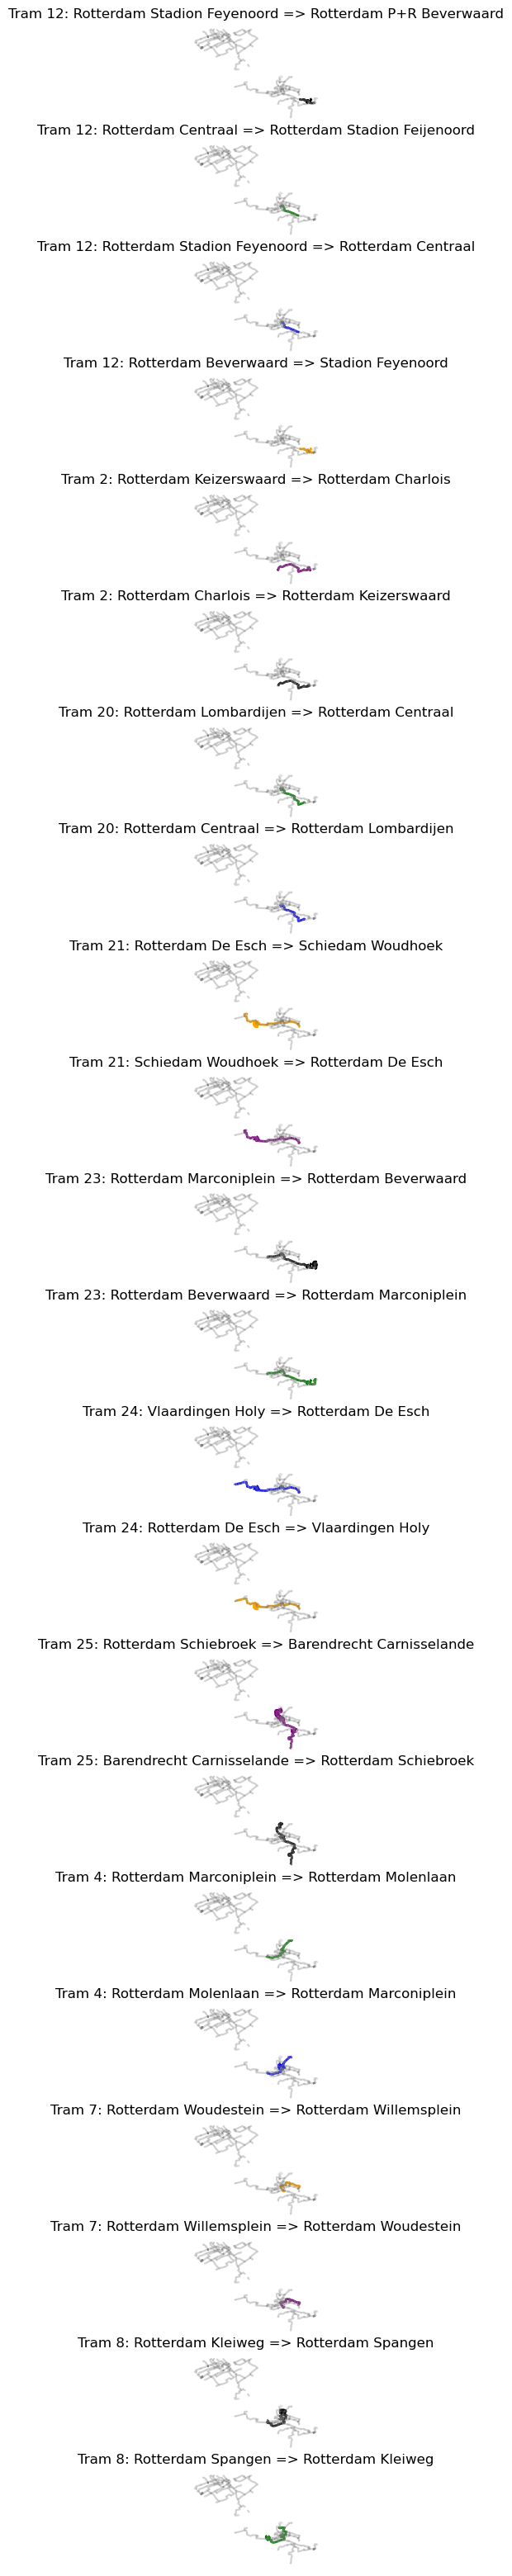

In [10]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, city_tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Rotterdam')

In [11]:
city_tram_order_route_dict

{'Tram 12: Rotterdam Stadion Feyenoord => Rotterdam P+R Beverwaard':    id                name                      geometry     geo_x      geo_y
 0  13      P+R Beverwaard  POINT (4.5683177 51.8858241)  4.568318  51.885824
 1   7           Akkeroord  POINT (4.5585074 51.8845883)  4.558507  51.884588
 2   4        Prinsenplein  POINT (4.5520636 51.8905274)  4.552064  51.890527
 3   6        Keizerswaard  POINT (4.5491523 51.8872042)  4.549152  51.887204
 4   3  Adriaan Volkerlaan  POINT (4.5461547 51.8920092)  4.546155  51.892009
 5   2           Dwarsdijk  POINT (4.5390573 51.8931991)  4.539057  51.893199
 6   1      Noorderhelling  POINT (4.5324029 51.8944748)  4.532403  51.894475
 7   0   Stadion Feyenoord  POINT (4.5242452 51.8957409)  4.524245  51.895741,
 'Tram 12: Rotterdam Centraal => Rotterdam Stadion Feijenoord':    id                  name                      geometry     geo_x      geo_y
 0  14     Stadion Feyenoord  POINT (4.5242452 51.8957409)  4.524245  51.895741
 1   3

In [13]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)